# ETL e Análise de Gastos dos Deputados Federais

<img src="../img/photo.jpg" referrerpolicy="same-origin" style="display: block; object-fit: cover; border-radius: 0px; width: 100%; height: 30vh; opacity: 1; object-position: center 50%;">


## Objetivo

O objetivo deste projeto é extrair, transformar e carregar dados relacionados aos gastos dos deputados federais do Brasil. Em seguida, os dados serão analisados para identificar padrões de gastos do ano em exercicío.

<a name="ancora"></a>

# Índice

1. [Extração dos dados](#ancora1)
2. [Transformação](#ancora2)
3. [Carregamento(Load)](#ancora3)
4. [EDA](#ancora4)   
5. [Conclusão](#ancora5)   

<a name="ancora"></a>

<a id="ancora1"></a>

## Extração dos dados


A fonte de dados utilizada para este projeto é o portal de dados abertos da Câmara dos Deputados do Brasil, disponível no site [Dados Abertos](https://dadosabertos.camara.leg.br/swagger/api.html#api).
<p>A coleta de dados será realizada por meio do uso da API disponibilizada pelo portal. </p>

In [61]:
# importação das bibliotecas
import pandas as pd
import requests

In [2]:
# Realizando o request dos dados dos deputados
url = "https://dadosabertos.camara.leg.br/api/v2/deputados?ordem=ASC&ordenarPor=nome"
resultado = requests.get(url)

In [62]:
# Convertendo em dataframe
deputados = pd.DataFrame(resultado.json()['dados'])

In [63]:
deputados.head()

,id,uri,nome,siglaPartido,uriPartido,siglaUf,idLegislatura,urlFoto,email
0,220593,https://dadosabertos.camara.leg.br/api/v2/depu...,Abilio Brunini,PL,https://dadosabertos.camara.leg.br/api/v2/part...,MT,57,https://www.camara.leg.br/internet/deputado/ba...,dep.abiliobrunini@camara.leg.br
1,204379,https://dadosabertos.camara.leg.br/api/v2/depu...,Acácio Favacho,MDB,https://dadosabertos.camara.leg.br/api/v2/part...,AP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.acaciofavacho@camara.leg.br
2,220714,https://dadosabertos.camara.leg.br/api/v2/depu...,Adail Filho,REPUBLICANOS,https://dadosabertos.camara.leg.br/api/v2/part...,AM,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adailfilho@camara.leg.br
3,221328,https://dadosabertos.camara.leg.br/api/v2/depu...,Adilson Barroso,PL,https://dadosabertos.camara.leg.br/api/v2/part...,SP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adilsonbarroso@camara.leg.br
4,204560,https://dadosabertos.camara.leg.br/api/v2/depu...,Adolfo Viana,PSDB,https://dadosabertos.camara.leg.br/api/v2/part...,BA,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adolfoviana@camara.leg.br


In [5]:
# conferindo o tamanho
deputados.shape

(513, 9)

* **A variárvel 'deputados' é um dataframe que contém informações sobre os 513 deputados federais, cada linha representa um deputado e as colunas contêm diferentes atributos e informações sobre os mesmos.**

* **Certo agora já temos uma base de dados dos deputados, precisamos agora realizar o request dos gastos.**
* **Neste caso iremos realizar um request de 100 registros de cada id.**

In [89]:
# Realizando o request dos gastos de 2023 dos deputatos 100 itens.
gastos = []
for id in deputados.id:
    url_despesa = "https://dadosabertos.camara.leg.br/api/v2/deputados/"
    url_despesa= url_despesa +str(id)+ "/despesas?ano=2023&itens=100&ordem=ASC&ordenarPor=ano"    
    resposta = requests.get(url_despesa)
    gasto = pd.DataFrame(resposta.json()['dados'])
    gasto['id'] = id
    gastos.append(gasto)       

In [107]:
# Foram coletados 100 registros de cada deputado para esse exemplo.
len(gastos[512])

100

In [92]:
# 100 linhas e 18 colunas.
gastos[0].shape

(100, 18)

In [93]:
# visualizando os 5 ultimos registros do primeiro id.
gastos[0].tail()

,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,dataDocumento,numDocumento,valorDocumento,urlDocumento,nomeFornecedor,cnpjCpfFornecedor,valorLiquido,valorGlosa,numRessarcimento,codLote,parcela,id
95,2023,4,COMBUSTÍVEIS E LUBRIFICANTES.,7553208,Nota Fiscal,0,2023-04-17,196407,183.85,https://www.camara.leg.br/cota-parlamentar/doc...,CENTRO DE SERVS FRANGO ASSADO NORTE LT,02896671001937,183.85,0.0,,1938971,0,220593
96,2023,8,COMBUSTÍVEIS E LUBRIFICANTES.,7602582,Nota Fiscal Eletrônica,4,2023-08-19,130045,86.03,http://www.camara.leg.br/cota-parlamentar/nota...,COMERCIAL 364 DE COMBUSTIVEIS LTDA,27744555000102,86.03,0.0,,1965161,0,220593
97,2023,2,COMBUSTÍVEIS E LUBRIFICANTES.,7499508,Nota Fiscal Eletrônica,4,2023-02-16,7121,153.13,http://www.camara.leg.br/cota-parlamentar/nota...,COMERCIAL AMAZONIA 02 DE PETROLEO EIRELI,09001879000322,153.13,0.0,,1909326,0,220593
98,2023,2,COMBUSTÍVEIS E LUBRIFICANTES.,7501717,Nota Fiscal Eletrônica,4,2023-02-20,7130,152.94,http://www.camara.leg.br/cota-parlamentar/nota...,COMERCIAL AMAZONIA 02 DE PETROLEO EIRELI,09001879000322,152.94,0.0,,1910831,0,220593
99,2023,2,COMBUSTÍVEIS E LUBRIFICANTES.,7502535,Nota Fiscal Eletrônica,4,2023-02-22,7138,144.48,http://www.camara.leg.br/cota-parlamentar/nota...,COMERCIAL AMAZONIA 02 DE PETROLEO EIRELI,09001879000322,144.48,0.0,,1910831,0,220593


[voltar](#ancora)

<a id="ancora2"></a>

## Transformação 

In [64]:
# verificando os atributos
deputados.columns 

Index(['id', 'uri', 'nome', 'siglaPartido', 'uriPartido', 'siglaUf',
       'idLegislatura', 'urlFoto', 'email'],
      dtype='object')

* **Para esse estudo vamos utilizar apenas os ['id', 'nome', 'siglaPartido','siglaUf','idLegislatura']**

In [65]:
deputados = deputados[['id', 'nome', 'siglaPartido','siglaUf','idLegislatura']]
deputados.head()

,id,nome,siglaPartido,siglaUf,idLegislatura
0,220593,Abilio Brunini,PL,MT,57
1,204379,Acácio Favacho,MDB,AP,57
2,220714,Adail Filho,REPUBLICANOS,AM,57
3,221328,Adilson Barroso,PL,SP,57
4,204560,Adolfo Viana,PSDB,BA,57


* **Vamos concatenar os 513 ids em um único dataframe usando o concat.**

In [228]:
# Concatenando 
total = pd.concat(gastos)

In [229]:
len(total)

48861

In [230]:
total.tail()

,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,dataDocumento,numDocumento,valorDocumento,urlDocumento,nomeFornecedor,cnpjCpfFornecedor,valorLiquido,valorGlosa,numRessarcimento,codLote,parcela,id
95,2023.0,8.0,COMBUSTÍVEIS E LUBRIFICANTES.,7601638.0,Nota Fiscal Eletrônica,4.0,2023-08-29,1332250,250.00,http://www.camara.leg.br/cota-parlamentar/nota...,COMERCIAL DE COMBUSTIVEIS PLANETARIO LTDA.,01157271000118,250.00,0.0,,1964622.0,0.0,220552
96,2023.0,3.0,COMBUSTÍVEIS E LUBRIFICANTES.,7513661.0,Nota Fiscal Eletrônica,4.0,2023-03-11,575375,217.75,http://www.camara.leg.br/cota-parlamentar/nota...,COMERCIO DE COMBUSTIVEIS FLORESTAL LTDA,02558109000921,217.75,0.0,,1916796.0,0.0,220552
97,2023.0,8.0,COMBUSTÍVEIS E LUBRIFICANTES.,7585426.0,Nota Fiscal Eletrônica,4.0,2023-08-06,2614301,245.96,http://www.camara.leg.br/cota-parlamentar/nota...,COML BUFFON COMB E TRANSP LTDA - POSTO 26,93489243002674,226.06,19.9,,1956583.0,0.0,220552
98,2023.0,7.0,COMBUSTÍVEIS E LUBRIFICANTES.,7585374.0,Nota Fiscal Eletrônica,4.0,2023-07-12,2220367,251.52,http://www.camara.leg.br/cota-parlamentar/nota...,COML BUFFON COMB E TRANSP LTDA - POSTO 47,93489243004707,251.52,0.0,,1956581.0,0.0,220552
99,2023.0,8.0,COMBUSTÍVEIS E LUBRIFICANTES.,7601513.0,Nota Fiscal Eletrônica,4.0,2023-08-25,2255317,249.66,http://www.camara.leg.br/cota-parlamentar/nota...,COML BUFFON COMB E TRANSP LTDA - POSTO 47,93489243004707,249.66,0.0,,1964622.0,0.0,220552


In [231]:
total.shape

(48861, 18)

In [232]:
# verificando valores ausentes
total.isnull().sum()

ano                     0
mes                     0
tipoDespesa             0
codDocumento            0
tipoDocumento           0
codTipoDocumento        0
dataDocumento         271
numDocumento            0
valorDocumento          0
urlDocumento         7800
nomeFornecedor          0
cnpjCpfFornecedor       0
valorLiquido            0
valorGlosa              0
numRessarcimento        0
codLote                 0
parcela                 0
id                      0
dtype: int64

In [233]:
# Removendo os atributos que possuem valores ausentes para esse exemplo.
del total['dataDocumento']
del total['urlDocumento']

In [234]:
total.head()

,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,numDocumento,valorDocumento,nomeFornecedor,cnpjCpfFornecedor,valorLiquido,valorGlosa,numRessarcimento,codLote,parcela,id
0,2023.0,5.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7552621.0,Nota Fiscal,0.0,11533052023001,43.2,AGUAS CUIABA S.A,14995581000153,43.2,0.0,,1938600.0,0.0,220593
1,2023.0,6.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7587236.0,Recibos/Outros,1.0,11533062023001,43.2,AGUAS CUIABA S.A,14995581000153,43.2,0.0,,1957493.0,0.0,220593
2,2023.0,7.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7587239.0,Nota Fiscal,0.0,11533072023001,43.2,AGUAS CUIABA S.A,14995581000153,43.2,0.0,,1957494.0,0.0,220593
3,2023.0,8.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7605225.0,Nota Fiscal,0.0,11533082023001,43.2,AGUAS CUIABA S.A,14995581000153,43.2,0.0,,1966665.0,0.0,220593
4,2023.0,4.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7538426.0,Nota Fiscal,0.0,s/n,43.2,AGUAS CUIABA S.A,14995581000153,43.2,0.0,,1931086.0,0.0,220593


In [235]:
# verificando a distribuição do atributo numRessarcimento
total.numRessarcimento.value_counts()

     42155
0     6706
Name: numRessarcimento, dtype: int64

* **nesse exemplo vamos remover o atributo 'numRessarcimento' também**.

In [236]:
del total['numRessarcimento']

In [237]:
total.head()

,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,numDocumento,valorDocumento,nomeFornecedor,cnpjCpfFornecedor,valorLiquido,valorGlosa,codLote,parcela,id
0,2023.0,5.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7552621.0,Nota Fiscal,0.0,11533052023001,43.2,AGUAS CUIABA S.A,14995581000153,43.2,0.0,1938600.0,0.0,220593
1,2023.0,6.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7587236.0,Recibos/Outros,1.0,11533062023001,43.2,AGUAS CUIABA S.A,14995581000153,43.2,0.0,1957493.0,0.0,220593
2,2023.0,7.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7587239.0,Nota Fiscal,0.0,11533072023001,43.2,AGUAS CUIABA S.A,14995581000153,43.2,0.0,1957494.0,0.0,220593
3,2023.0,8.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7605225.0,Nota Fiscal,0.0,11533082023001,43.2,AGUAS CUIABA S.A,14995581000153,43.2,0.0,1966665.0,0.0,220593
4,2023.0,4.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7538426.0,Nota Fiscal,0.0,s/n,43.2,AGUAS CUIABA S.A,14995581000153,43.2,0.0,1931086.0,0.0,220593


In [238]:
# Removendo linhas duplicadas se houver.
print(total.shape)
total.drop_duplicates()
print(total.shape)

(48861, 15)
(48861, 15)


In [239]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48861 entries, 0 to 99
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ano                48861 non-null  float64
 1   mes                48861 non-null  float64
 2   tipoDespesa        48861 non-null  object 
 3   codDocumento       48861 non-null  float64
 4   tipoDocumento      48861 non-null  object 
 5   codTipoDocumento   48861 non-null  float64
 6   numDocumento       48861 non-null  object 
 7   valorDocumento     48861 non-null  float64
 8   nomeFornecedor     48861 non-null  object 
 9   cnpjCpfFornecedor  48861 non-null  object 
 10  valorLiquido       48861 non-null  float64
 11  valorGlosa         48861 non-null  float64
 12  codLote            48861 non-null  float64
 13  parcela            48861 non-null  float64
 14  id                 48861 non-null  int64  
dtypes: float64(9), int64(1), object(5)
memory usage: 6.0+ MB


In [240]:
total.describe()

,ano,mes,codDocumento,codTipoDocumento,valorDocumento,valorLiquido,valorGlosa,codLote,parcela,id
count,48861.0,48861.000000,4.886100e+04,48861.000000,48861.000000,48861.000000,48861.000000,4.886100e+04,48861.000000,48861.000000
mean,2023.0,4.433515,6.536420e+06,1.788277,1348.981213,1342.749334,6.182949,1.669583e+06,0.000041,180534.142138
std,0.0,2.399120,2.535850e+06,1.879662,3332.206329,3323.586816,125.331093,6.661678e+05,0.006398,49932.747346
min,2023.0,1.000000,0.000000e+00,0.000000,-1812.260000,-1812.260000,0.000000,0.000000e+00,0.000000,62881.000000
25%,2023.0,2.000000,7.500171e+06,0.000000,169.910000,168.020000,0.000000,1.909773e+06,0.000000,160558.000000
50%,2023.0,4.000000,7.535658e+06,1.000000,270.020000,269.000000,0.000000,1.929174e+06,0.000000,204457.000000
75%,2023.0,6.000000,7.572639e+06,4.000000,1147.330000,1134.610000,0.000000,1.949787e+06,0.000000,220588.000000
max,2023.0,9.000000,7.612783e+06,4.000000,124000.000000,124000.000000,14050.000000,1.970613e+06,1.000000,226553.000000


In [241]:
#Verificando a distribuição por fornecedores.
total.nomeFornecedor.value_counts().head(25)

TAM                                                              3113
GOL                                                              1428
031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA          935
AZUL                                                              865
AUTO POSTO CINCO ESTRELAS LTDA                                    665
UBER DO BRASIL TECNOLOGIA LTDA.                                   601
063 - 311 SUL - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA            597
WMS COMERCIO DE ARTIGOS DE PAPELARIA LTDA-ME                      530
AUTO POSTO AEROPORTO LTDA                                         501
AUTO POSTO 303 NORTE LTDA                                         474
CELULAR FUNCIONAL                                                 464
Telefônica Brasil S.A. VIVO                                       413
AMORETTO CAFES EXPRESSO LTDA                                      322
076 - MELHOR 10 - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA          290
RAMAL               

In [242]:
#Convertendo a coluna em uma lista para podermos realizar uma verificação mais detalhada
fornecedores = total.nomeFornecedor.value_counts().index.tolist()

In [243]:
# Ordenando para comparar erros de digitação etc...
fornecedores.sort(reverse=True)
fornecedores

['ÍRIO JOSÉ FELIPE DIAS LTDA',
 'É RIO PRETO COMUNICAÇÃO E MARKETING DIGITAL EIRELE',
 'Águas de Joinville',
 'zeta  paineis ltda',
 'viviani silveira',
 'viu internet',
 'viewclinic ltda',
 'viação novo horizonte LTDA',
 'via Brasil MT-246 Concessionaria',
 'valdiney maciel da silva',
 'use comunicações e telecomunicações ltda',
 'turbo cloud',
 'triunfo service ltda',
 'tecnodinamica importacao e comercio de m',
 'strutura desing comercio e locadora de bens moveis',
 'stada hoteis hangar scp',
 'sobral & Palacio petroleo LTDA',
 'serrana fm',
 'segpol serviços de segurança eletrônica ltda',
 'sTelefônica Brasil S.A. VIVO',
 'ronaldo guedine ribeiro',
 'rede grill auto posto LTDA',
 'real materias de limpeza e alimentos ltda',
 'print & copy comercio eireli me',
 'prefeitura municipal de campo grande',
 'posto z 14 ltda',
 'posto vargas de viçosa',
 'posto servsul',
 'posto sao domingos ltda',
 'posto santo onofre',
 'posto meneguetti',
 'posto fernão dias',
 'posto expresso amazonas'

* **Temos alguns problemas aqui, erros de digitação, problemas de acentuação, casos onde foi acrescentado LTDA e S.A**
* **Vamos remover todas as acentuações primeiro, depois os espaços e vamos remover tudo que contiver LTDA, S.A e depois dessas informações também para tentarmos corrigir a maior quantidade de informações incorretas.**

In [244]:
# Removendo todas as acentuações e os espaços duplos
total.nomeFornecedor = [unidecode(fornecedor).strip() for fornecedor in total.nomeFornecedor]

In [245]:
# Removento tudo que LTDA e S.A e o que houver após também.
import re
exp_regurar = r"(LTDA|S\.A).*$" # "LTDA", "S.A" texto a ser removido
total.nomeFornecedor = [re.sub(exp_regurar,"",fornecedor).strip() for fornecedor in total.nomeFornecedor]

In [246]:
# Conferindo a distribuição.
total.nomeFornecedor.value_counts().head(25)

TAM                                                              3113
GOL                                                              1428
031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEICULOS               935
AZUL                                                              865
AUTO POSTO CINCO ESTRELAS                                         681
UBER DO BRASIL TECNOLOGIA                                         603
063 - 311 SUL - CASCOL COMBUSTIVEIS PARA VEICULOS                 597
WMS COMERCIO DE ARTIGOS DE PAPELARIA                              532
AUTO POSTO AEROPORTO                                              501
AUTO POSTO 303 NORTE                                              474
CELULAR FUNCIONAL                                                 464
Telefonica Brasil                                                 430
AMORETTO CAFES EXPRESSO                                           322
076 - MELHOR 10 - CASCOL COMBUSTIVEIS PARA VEICULOS               290
RAMAL               

In [247]:
total.head()

,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,numDocumento,valorDocumento,nomeFornecedor,cnpjCpfFornecedor,valorLiquido,valorGlosa,codLote,parcela,id
0,2023.0,5.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7552621.0,Nota Fiscal,0.0,11533052023001,43.2,AGUAS CUIABA,14995581000153,43.2,0.0,1938600.0,0.0,220593
1,2023.0,6.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7587236.0,Recibos/Outros,1.0,11533062023001,43.2,AGUAS CUIABA,14995581000153,43.2,0.0,1957493.0,0.0,220593
2,2023.0,7.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7587239.0,Nota Fiscal,0.0,11533072023001,43.2,AGUAS CUIABA,14995581000153,43.2,0.0,1957494.0,0.0,220593
3,2023.0,8.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7605225.0,Nota Fiscal,0.0,11533082023001,43.2,AGUAS CUIABA,14995581000153,43.2,0.0,1966665.0,0.0,220593
4,2023.0,4.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7538426.0,Nota Fiscal,0.0,s/n,43.2,AGUAS CUIABA,14995581000153,43.2,0.0,1931086.0,0.0,220593


* **Bom agora que já temos as tabelas deputados e gastos vamos realizar o merge em uma única tabela para depois realizarmos a etape de Load.**

In [248]:
# realizando o merge de ambas as tabelas pelo atributo ID.
total = total.merge(deputados, on=['id'])
total.head()

,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,numDocumento,valorDocumento,nomeFornecedor,cnpjCpfFornecedor,valorLiquido,valorGlosa,codLote,parcela,id,nome,siglaPartido,siglaUf,idLegislatura
0,2023.0,5.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7552621.0,Nota Fiscal,0.0,11533052023001,43.2,AGUAS CUIABA,14995581000153,43.2,0.0,1938600.0,0.0,220593,Abilio Brunini,PL,MT,57
1,2023.0,6.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7587236.0,Recibos/Outros,1.0,11533062023001,43.2,AGUAS CUIABA,14995581000153,43.2,0.0,1957493.0,0.0,220593,Abilio Brunini,PL,MT,57
2,2023.0,7.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7587239.0,Nota Fiscal,0.0,11533072023001,43.2,AGUAS CUIABA,14995581000153,43.2,0.0,1957494.0,0.0,220593,Abilio Brunini,PL,MT,57
3,2023.0,8.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7605225.0,Nota Fiscal,0.0,11533082023001,43.2,AGUAS CUIABA,14995581000153,43.2,0.0,1966665.0,0.0,220593,Abilio Brunini,PL,MT,57
4,2023.0,4.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7538426.0,Nota Fiscal,0.0,s/n,43.2,AGUAS CUIABA,14995581000153,43.2,0.0,1931086.0,0.0,220593,Abilio Brunini,PL,MT,57


* **Bom com isso terminamos nossa etapa de transformação, claro que poderíamos tratar mais dados e fazer uma verificação mais detalhada, porém nesse momento vamos parar por aqui, agora precisamos partir para próxima etapa que é a de carregamento.**
* **Para o carregamento vamos usar um banco de dados relacional sqLite, pois são poucos dados o que se encaixa perfeitamente nesse caso.**

[voltar](#ancora)

<a id="ancora3"></a>

## Carregamento(Load)

In [249]:
# importando a lib
from sqlalchemy import create_engine

In [250]:
# Criando a conexão e o banco de dados gastos_deputados.db
engine = create_engine('sqlite:///gastos_deputados.db')

In [251]:
# Criando a tabela despesas_deputados com os dados ao banco de dados.
total.to_sql('despesas_deputados', engine, index=False)

48861

* **Pronto com isso concluímos todas as etapas do ETL**.
* **Agora podemos carregar os dados salvos e partir para uma analise exploratória.**

[voltar](#ancora)

<a id="ancora4"></a>

## Análise EDA

In [252]:
total = pd.read_sql("select * from despesas_deputados;", engine)

In [253]:
total.head()

,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,numDocumento,valorDocumento,nomeFornecedor,cnpjCpfFornecedor,valorLiquido,valorGlosa,codLote,parcela,id,nome,siglaPartido,siglaUf,idLegislatura
0,2023.0,5.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7552621.0,Nota Fiscal,0.0,11533052023001,43.2,AGUAS CUIABA,14995581000153,43.2,0.0,1938600.0,0.0,220593,Abilio Brunini,PL,MT,57
1,2023.0,6.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7587236.0,Recibos/Outros,1.0,11533062023001,43.2,AGUAS CUIABA,14995581000153,43.2,0.0,1957493.0,0.0,220593,Abilio Brunini,PL,MT,57
2,2023.0,7.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7587239.0,Nota Fiscal,0.0,11533072023001,43.2,AGUAS CUIABA,14995581000153,43.2,0.0,1957494.0,0.0,220593,Abilio Brunini,PL,MT,57
3,2023.0,8.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7605225.0,Nota Fiscal,0.0,11533082023001,43.2,AGUAS CUIABA,14995581000153,43.2,0.0,1966665.0,0.0,220593,Abilio Brunini,PL,MT,57
4,2023.0,4.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7538426.0,Nota Fiscal,0.0,s/n,43.2,AGUAS CUIABA,14995581000153,43.2,0.0,1931086.0,0.0,220593,Abilio Brunini,PL,MT,57


### Qual a distribuição por partidos?

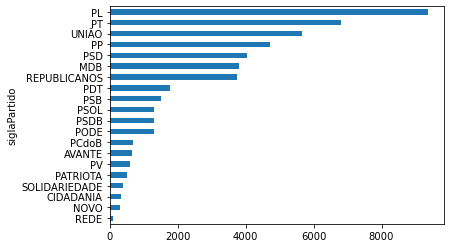

In [254]:
total.value_counts('siglaPartido', ascending=True).plot(kind='barh');

### Os 10 deputados que mais tiveram despesas durante o período todo?

In [305]:
gastos_deputados = total.groupby(['nome']).sum()[['valorDocumento', 'valorLiquido']].reset_index()
gastos_deputados = gastos_deputados.sort_values('valorDocumento', ascending=False)
gastos_deputados.head(10)

,nome,valorDocumento,valorLiquido
491,Vinicius Gurgel,398189.31,398189.31
142,Dilvanda Faro,395749.85,387140.52
509,Átila Lins,395358.49,395211.78
145,Domingos Neto,392320.77,391597.82
335,Marcos Aurélio Sampaio,387464.80,387463.24
135,Delegado Éder Mauro,381411.96,381411.96
2,Acácio Favacho,381184.42,381183.54
489,Vicentinho Júnior,380812.10,380812.10
43,Antônia Lúcia,370717.67,370475.29
149,Dr. Benjamim,369556.59,363802.38


In [308]:
gastos_deputados.head(10).sum()

nome              Vinicius GurgelDilvanda FaroÁtila LinsDomingos...
valorDocumento                                           3852765.96
valorLiquido                                             3837287.94
dtype: object

* **Os valores acumulados de despesas dos 10 deputados mais gastões no perído do Mês 2 ao final do Mês 9 chegaram na casa dos 3.850 milhão de Reais.**

### Os 10 Deputados que tiveram menos despesas durante todo o período?

In [306]:
gastos_deputados.tail(10)

,nome,valorDocumento,valorLiquido
325,Marcelo Calero,22421.68,22321.07
3,Adail Filho,21856.35,21856.35
318,Lula da Fonte,20433.09,20188.30
187,Fernanda Pessoa,19726.23,19701.24
350,Mauricio do Vôlei,18819.73,18819.73
274,Juliana Cardoso,18602.40,18602.40
414,Priscila Costa,15531.74,15531.74
148,Doutor Luizinho,14743.43,14743.43
118,Daniela do Waguinho,7891.29,7883.21
81,Carmen Zanotto,5051.71,5051.71


### Quais os principais fornecedores?

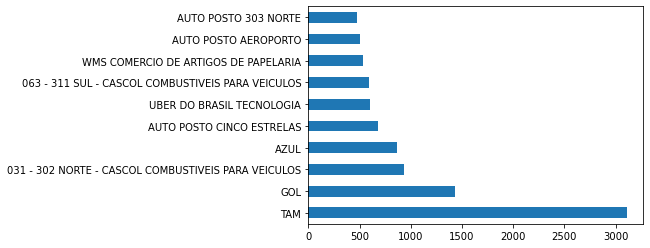

In [262]:
total.nomeFornecedor.value_counts(ascending=False)[:10].plot(kind="barh");

* **Aparentemente as maiores despesas provém de companhias aéreas.**
* **A vida não deve estar fácil para esses deputados, pegando transporte público em horário de pico.**

### Quais os partidos que mais tiveram despesas?

In [303]:
gastos_partidos = total.groupby(['siglaPartido']).sum()[['valorDocumento']].reset_index()
gastos_partidos = gastos_partidos.sort_values('valorDocumento', ascending=False)
gastos_partidos.head()

,siglaPartido,valorDocumento
7,PL,13154841.02
14,PT,8292440.67
19,UNIÃO,7834107.29
9,PP,6362652.02
2,MDB,5575425.19


* **Acima estão o 5 partidos que tiveram mais despesas, porém essa não é a melhor forma de confirmação, pois a disdrituição dos deputados não seguem uma proporção equilibrada. Para esse cenário podemos utilizar a média de gastos por partido.**

### Qual a média das despesas por partido?

In [304]:
media_gastos_partidos = total.groupby(['siglaPartido']).mean()[['valorDocumento']].reset_index()
media_gastos_partidos = media_gastos_partidos.sort_values('valorDocumento', ascending=False)
media_gastos_partidos.head()

,siglaPartido,valorDocumento
8,PODE,1771.795991
5,PCdoB,1538.396029
2,MDB,1466.059740
17,REPUBLICANOS,1445.554773
7,PL,1402.734167


* **Acima podemos ter uma visão real que qual partido estão gastando mais, através das médias das despesas.**

### Analisar os gastos mensais

In [322]:
gastos_partidos_mes = total.groupby(['mes'])['valorDocumento'].sum().reset_index()
gastos_partidos_mes = gastos_partidos_mes.sort_values(['mes'], ascending=True)
gastos_partidos_mes

,mes,valorDocumento
0,1.0,8824256.39
1,2.0,6588375.98
2,3.0,8203354.37
3,4.0,8330632.57
4,5.0,9076410.68
5,6.0,8112732.53
6,7.0,7909627.64
7,8.0,7334210.64
8,9.0,1532970.23


In [ ]:
# importação das libs.
import matplotlib.pyplot as plt
import seaborn as sns

# Função para criar um gráfico de barras
def plot_bar_chart(data, x, y, title, color='blue'):
    plt.figure(figsize=(10, 6))
    sns.barplot(data=data, x=x, y=y,color=color)
    plt.ticklabel_format(style='plain', axis='y')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

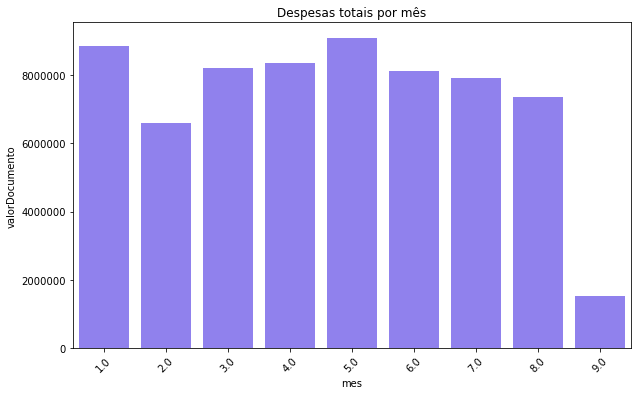

In [342]:
plot_bar_chart(gastos_partidos_mes,'mes', 'valorDocumento', 'Despesas totais por mês', color='#836FFF')

In [348]:
gastos_partidos_mes[:-1]['valorDocumento'].mean()

8047450.100000001

* **Aparentemente existe um padrão na casa de 8 milhão por mês.**

[voltar](#ancora)

<a id="ancora5"></a>

## Conclusão

**Com isso concluí todas as etapas da ETL. Extraí os dados dos deputados federeais e suas despesas via API dos Dados Abertos, realizei a limpeza, correção de erros e o merge das tabelas na etapa de transformação e por fim salvei a tabelas no banco de dados SQLite finalizando a etapa de Carregamento.**
**Com os dados já preparados, fiz extração do banco de dados para uma breve análise exploratória, para responder algumas questões sobre a distribuição dos partidos, as principais despesas e fornecedores, a média das despesas por partido e rank dos 10 deputados com maior e menor despesas.**

[voltar](#ancora)